 # Training of the AI model with Google Colab for faster training

#### Importing face mask dataset from Google Drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Unzipping images:

In [2]:
import os
from zipfile import ZipFile

path = r'/content/drive/My Drive/Data/FaceMask_Dataset'

for zip in os.listdir(path):
  file_name = os.path.join(path, zip)
  print('Unziping: ' + file_name)
  with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

Unziping: /content/drive/My Drive/Data/FaceMask_Dataset/OkFaceMask.zip
Done
Unziping: /content/drive/My Drive/Data/FaceMask_Dataset/NoFaceMask.zip
Done
Unziping: /content/drive/My Drive/Data/FaceMask_Dataset/BadFaceMask.zip
Done


#### Preparing the input data (images) and the output (prediction):

In [3]:
import pathlib
import cv2
import numpy as np

imageSize = 100
channel = 1 
path = '/content'
X = [] # Data
Y = [] # Label

dict_label  = { 'NoFaceMask':0 , 'OkFaceMask':1 , 'BadFaceMask':2 }

faceMaskDirectories = [str(directory) for directory in pathlib.Path(path).glob('*') if 'Mask' in str(directory)]

for directory in faceMaskDirectories:
  for image in pathlib.Path(directory).glob('*/*'):
    if image.suffix in {'.jpg', '.png'}:
      img = cv2.imread(str(image), 0)
      X.append(img)
      Y.append(dict_label[directory.split('/')[-1]])

X = np.asarray(X)
Y = np.asarray(Y)
print('Array X type: ' , type(X))
print('Array Y type: ' , type(Y))
print('Array X shape:' , X.shape)
print('Array Y shape:' , Y.shape)

Array X type:  <class 'numpy.ndarray'>
Array Y type:  <class 'numpy.ndarray'>
Array X shape: (14339, 100, 100)
Array Y shape: (14339,)


#### Image and label:

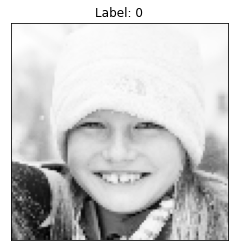

In [4]:
import matplotlib.pyplot as plt
exampleImage = 5000
plt.imshow(X[exampleImage], cmap='Greys_r')
plt.title('Label: ' + str(Y[exampleImage]))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.show()

#### Images per label:

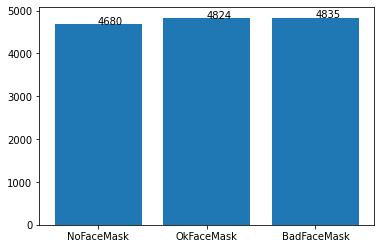

In [5]:
labels, counts = np.unique(Y, return_counts=True)
labels = np.asarray(list(dict_label.keys()))
for i in range(len(labels)):
  plt.text(x=labels[i] , y =counts[i], s=counts[i], fontdict=dict(fontsize=10))
plt.bar(labels, counts, align='center')
plt.show()

#### Splitting dataset:

In [6]:
from tensorflow.python.keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# Data reshape for the model entry
X = X.reshape((X.shape[0],X.shape[1],X.shape[2],1))

# Converting vector to binary class matrix
Y = to_categorical(Y)

# Normalization
X = X/255.0

# Dataset split into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=42)

#### Creating CNN model:

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, SpatialDropout2D, Conv2D, MaxPooling2D
import keras

keras.backend.clear_session()

model=Sequential()

model.add(Conv2D(2,(5,5), input_shape=(100, 100, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(SpatialDropout2D(0.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(SpatialDropout2D(0.2))

model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#### Training the model:


In [34]:
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=64)

Epoch 1/20
169/169 [==============================] - 2s 11ms/step - loss: 1.0724 - accuracy: 0.4002 - val_loss: 1.0276 - val_accuracy: 0.4918
Epoch 2/20
169/169 [==============================] - 1s 9ms/step - loss: 0.9821 - accuracy: 0.5205 - val_loss: 1.1545 - val_accuracy: 0.3406
Epoch 3/20
169/169 [==============================] - 1s 9ms/step - loss: 0.8765 - accuracy: 0.6159 - val_loss: 0.7880 - val_accuracy: 0.8014
Epoch 4/20
169/169 [==============================] - 1s 8ms/step - loss: 0.7660 - accuracy: 0.6815 - val_loss: 0.8986 - val_accuracy: 0.6134
Epoch 5/20
169/169 [==============================] - 1s 8ms/step - loss: 0.6648 - accuracy: 0.7425 - val_loss: 0.7084 - val_accuracy: 0.5919
Epoch 6/20
169/169 [==============================] - 1s 8ms/step - loss: 0.6585 - accuracy: 0.7535 - val_loss: 0.4852 - val_accuracy: 0.8731
Epoch 7/20
169/169 [==============================] - 1s 9ms/step - loss: 0.5715 - accuracy: 0.7895 - val_loss: 0.4034 - val_accuracy: 0.8926
Epoch

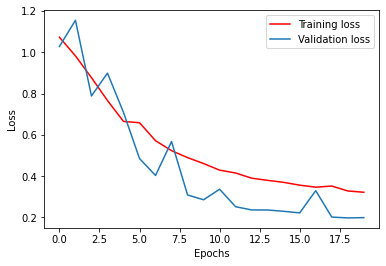

In [35]:
plt.plot(hist.history['loss'],'r',label='Training loss')
plt.plot(hist.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

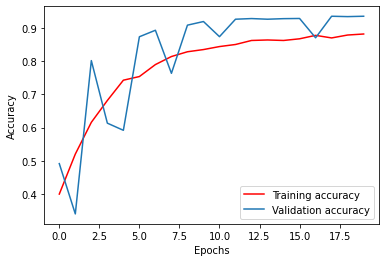

In [36]:
plt.plot(hist.history['accuracy'],'r',label='Training accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()